# SVD bosonic results plot

In [2]:
import pickle
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import numpy as np

# Load data

In [4]:
with open(r'data/fermionic_cases/svd_solutions/4_boundary_site_phase_data.pkl', 'rb') as f:
    data_4_site = pickle.load(f)

with open(r'data/fermionic_cases/svd_solutions/2_boundary_site_phase_data.pkl', 'rb') as f:
    data_2_site = pickle.load(f)

# Plot

In [5]:
colors = [
    'tab:blue',
    'tab:orange',
    'tab:green'
]

symmetry_labels = [
    'II',
    'IX',
    'XI',
    'XX'
]

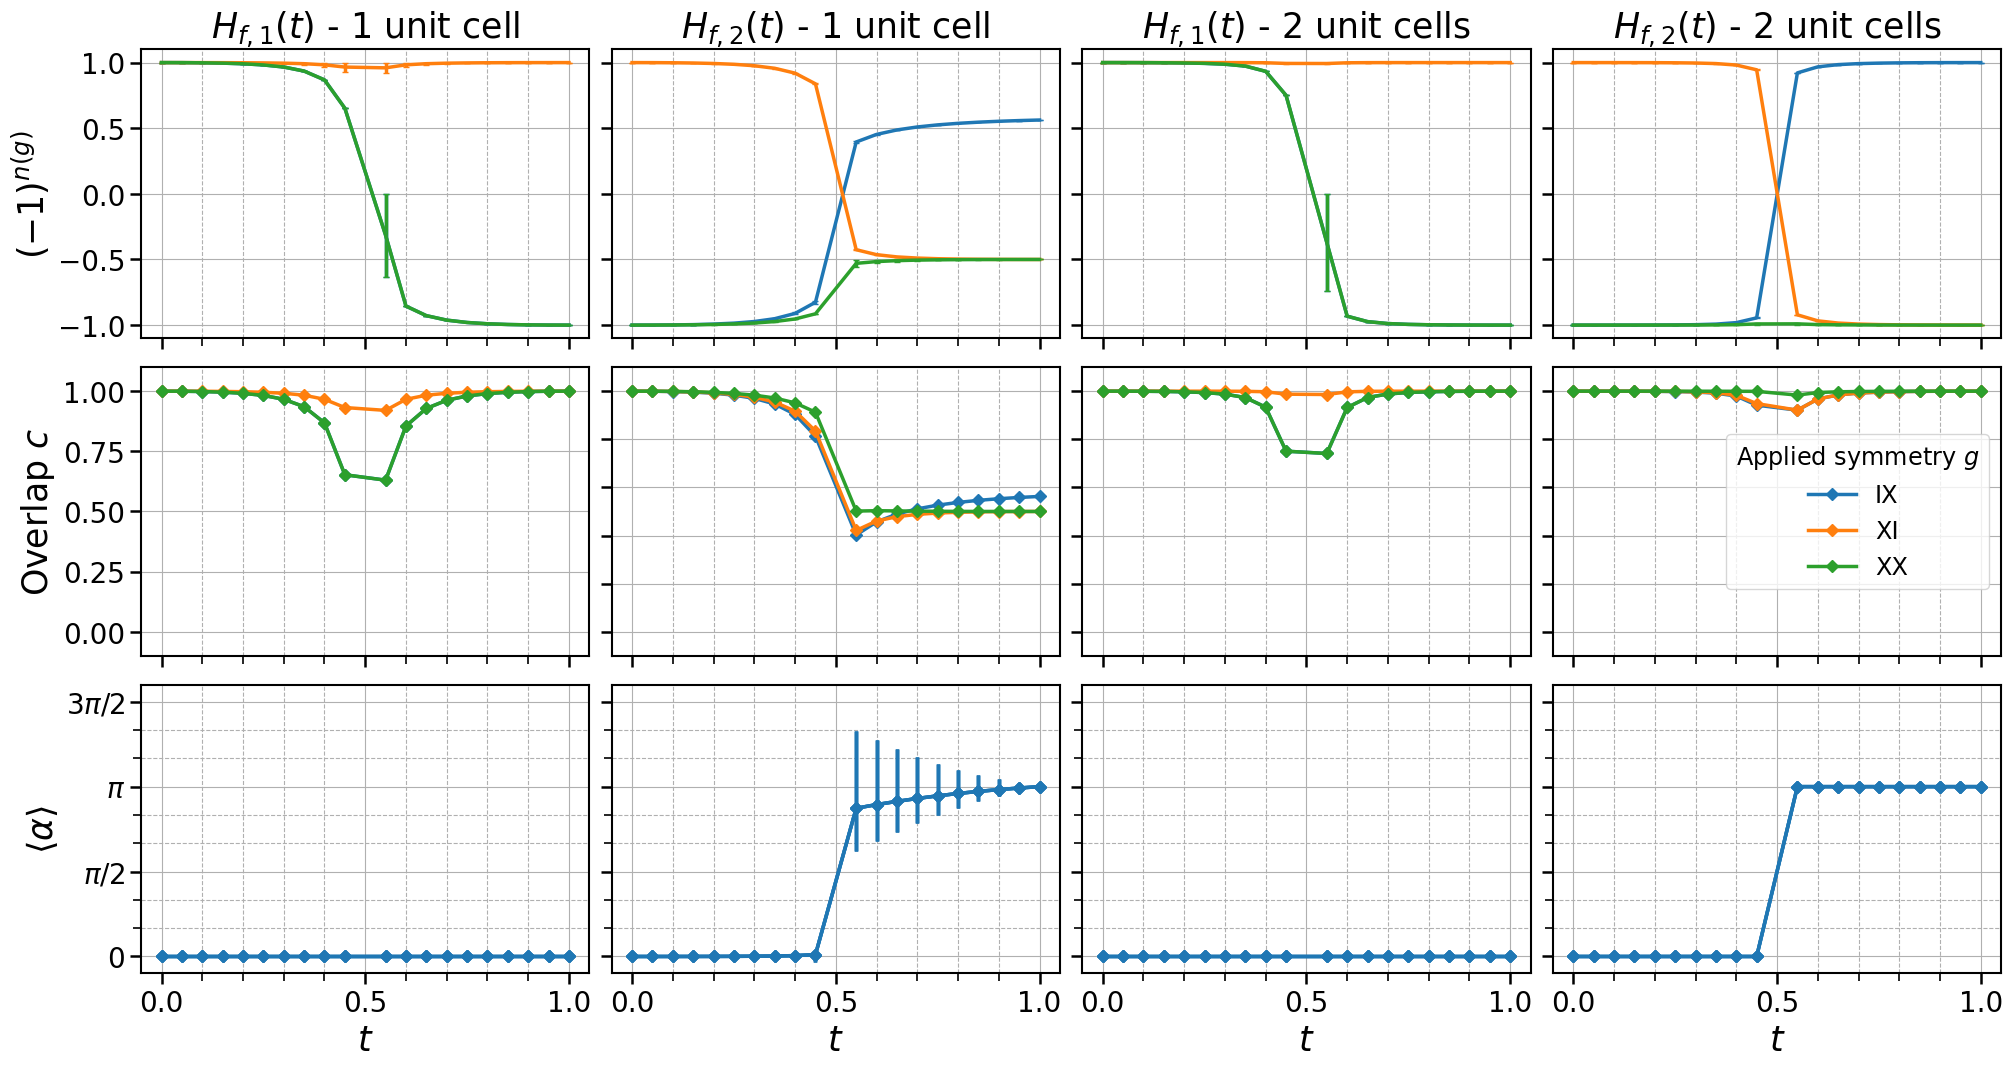

In [24]:
figure_label_fontsize=25
y_tick_label_fontsize=20
y_label_fontsize=25
x_tick_label_fontsize=20
x_label_fontsize=25
row_label_fontsize=25

axis_spine_linewidth = 1.5

major_tick_length = 8
major_tick_width = 1.8
minor_tick_length = 6
minor_tick_width = 1.2

phase_linewidth = 2.5

fig, ax_grid = plt.subplots(
    figsize=(24, 12),
    ncols=4,
    nrows=3
)

for j, (col, label) in enumerate(zip(colors, symmetry_labels[1:])):
    for i, ax_row in enumerate(ax_grid):
        for k, ax in enumerate(ax_row):
            if i == 0:
                if k < 2:
                    ax.errorbar(
                        data_2_site['interpolation_values'][::-1],
                        data_2_site['mean_fp_charges'][k, :, j],
                        yerr=data_2_site['err_fp_charges'][k, :, j],
                        color=col,
                        label=label,
                        fmt='-',
                        capsize=2,
                        linewidth=phase_linewidth
                    )
                else:
                    ax.errorbar(
                        data_4_site['interpolation_values'][::-1],
                        data_4_site['mean_fp_charges'][k%2, :, j],
                        yerr=data_4_site['err_fp_charges'][k%2, :, j],
                        color=col,
                        label=label,
                        fmt='-',
                        capsize=2,
                        linewidth=phase_linewidth
                    )

            if i==1:
                if k < 2:
                    ax.plot(
                        data_2_site['interpolation_values'][::-1],
                        data_2_site['overlaps'][k, :, j],
                        color=col,
                        label=label,
                        marker='D',
                        linewidth=phase_linewidth
                    )
                else:
                    ax.plot(
                        data_4_site['interpolation_values'][::-1],
                        data_4_site['overlaps'][k%2, :, j],
                        color=col,
                        label=label,
                        marker='D',
                        linewidth=phase_linewidth
                    )

            if i==2:
                if k < 2:
                    ax.errorbar(
                        data_2_site['interpolation_values'][::-1],
                        data_2_site['mean_gauge_invariant_proj_rep_angle'][k],
                        yerr=data_2_site['error_gauge_invariant_proj_rep_angle'][:, k],
                        color='tab:blue',
                        marker='D',
                        linewidth=phase_linewidth
                    )
                else:
                    ax.errorbar(
                        data_4_site['interpolation_values'][::-1],
                        data_4_site['mean_gauge_invariant_proj_rep_angle'][k%2],
                        yerr=data_4_site['error_gauge_invariant_proj_rep_angle'][:, k%2],
                        color='tab:blue',
                        marker='D',
                        linewidth=phase_linewidth
                    )

for i in range(4):
    ax_grid[0][i].set_ylim(-1.1, 1.1)
    ax_grid[1][i].set_ylim(-0.1, 1.1)
    ax_grid[2][i].set_ylim((-0.1)*np.pi, np.pi*(1.6))

ax_grid[0][0].title.set_text(rf'$H_{{f,{1}}}(t)$ - 1 unit cell')
ax_grid[0][1].title.set_text(rf'$H_{{f,{2}}}(t)$ - 1 unit cell')
ax_grid[0][2].title.set_text(rf'$H_{{f,{1}}}(t)$ - 2 unit cells')
ax_grid[0][3].title.set_text(rf'$H_{{f,{2}}}(t)$ - 2 unit cells')

for i, ax_row in enumerate(ax_grid):
    for j, ax in enumerate(ax_row):
        ax.xaxis.set_major_locator(
            matplotlib.ticker.MultipleLocator(0.5)
        )
        ax.xaxis.set_minor_locator(
            matplotlib.ticker.MultipleLocator(0.1)
        )

        ax.grid(
            which='major',
            axis='both',
            zorder=-1e10
        )
        
        ax.grid(
            which='minor',
            axis='both',
            linestyle='--',
            zorder=-1e10
        )

        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(axis_spine_linewidth)

        ax.tick_params(
            axis='both',
            which='major',
            length=major_tick_length,
            width=major_tick_width
        )

        ax.tick_params(
            axis='both',
            which='minor',
            length=minor_tick_length,
            width=minor_tick_width
        )

        if i == 0:
            ax.title.set_fontsize(figure_label_fontsize)
    
            ax.yaxis.set_major_locator(
                matplotlib.ticker.MultipleLocator(0.5)
            )

        if i == 2:
            ax.set_yticks(
                np.linspace(0, 1.5*np.pi, 4),
                labels=['$0$', '$\pi/2$', '$\pi$', '$3\pi/2$']
            )
            
            ax.set_yticks(
                [
                    np.pi/6,
                    np.pi/3,
                    2*np.pi/3,
                    5*np.pi/6,
                    7*np.pi/6,
                    8*np.pi/6
                ],
                minor=True
            )

            ax.set_xlabel('$t$', fontsize=x_label_fontsize)

            ax.tick_params(
                axis='x',
                which='major',
                labelsize=x_tick_label_fontsize
            )
        """
            ax.grid(
                which='minor',
                axis='y',
                linestyle='--',
                zorder=-1e10
            )
        """
        if j == 0:
            ax.tick_params(
                axis='y',
                which='major',
                labelsize=y_tick_label_fontsize
            )

        if j != 0:
            ax.set_yticklabels([])
            ax.yaxis.set_label_position("right")
        if i!= 2:
            ax.set_xticklabels([])

ax_grid[0][0].set_ylabel(r'$(-1)^{n(g)}$', fontsize=y_label_fontsize)
ax_grid[1][0].set_ylabel(r'Overlap $c$', fontsize=y_label_fontsize)
ax_grid[2][0].set_ylabel(r'$\langle \alpha \rangle$', fontsize=y_label_fontsize)

for i, l in enumerate('ab'):
    ax_grid[i][1].set_ylabel(
        f'({l})',
        fontsize=row_label_fontsize,
        rotation='horizontal',
        ha='left',
        labelpad=13
    )

ax_grid[1][3].legend(
    loc='center right',
    title='Applied symmetry $g$',
    fontsize='xx-large',
    title_fontsize='xx-large'
)

fig.subplots_adjust(wspace=0.05, hspace=0.1)

fig.savefig(
    r'plots/fermionic_svd_results.png',
    dpi=200,
    bbox_inches='tight'
)
